<a href="https://colab.research.google.com/github/Rudranxh2007/Plant_based_water_needs_202401100300205/blob/main/Rudransh_Mishra_202401100300205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score  support
0              0.000000  0.000000  0.000000     5.00
1              0.600000  0.545455  0.571429    11.00
2              0.142857  0.250000  0.181818     4.00
accuracy       0.350000  0.350000  0.350000     0.35
macro avg      0.247619  0.265152  0.251082    20.00
weighted avg   0.358571  0.350000  0.350649    20.00


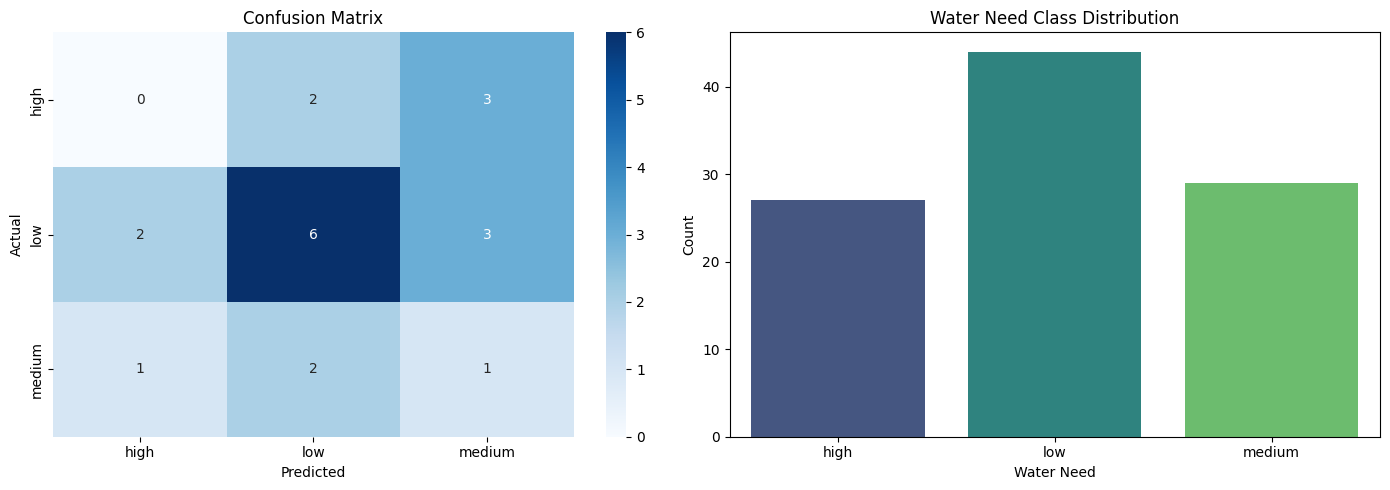

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load dataset
df = pd.read_csv("/content/plants.csv")

# Encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Define features and target
X = df.drop("water_need", axis=1)
y = df["water_need"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoders["water_need"].classes_

plt.figure(figsize=(14, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Class Distribution Bar Chart
plt.subplot(1, 2, 2)
class_counts = df["water_need"].value_counts().sort_index()
# Use inverse_transform on the full list at once (avoids loop + warning)
inverse_labels = label_encoders["water_need"].inverse_transform(class_counts.index)
sns.barplot(x=inverse_labels, y=class_counts.values, palette="viridis")
plt.title("Water Need Class Distribution")
plt.xlabel("Water Need")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
